# Monte Carlo Simulation, Central Limit Theorem and Hypothesis Tesing

### purpose of this assignment
- Implement Monte Carlo simulation.
- Observe and understand the Central Limit Theorem in action.
- Understanding how hypothesis testing can help in analyzing data and making decisions based on it in different situations.

In [1]:
from  piCalculation import *
from menschGame import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform
from scipy import stats
import pandas as pd

## 1. Monte Carlo Simulation

### 1.1 Pi Calculation
This following code is an implementation of the Monte Carlo method to estimate the value of `pi`. The code generates a specified number of random points within a square, and then checks if each point is within a circle with a radius equal to the half of the square's side. The ratio of points inside the circle is then multiplied by 4 to get an estimate of the value of `pi`. The main function generates random points, estimates `pi`, and prints the result.


In [2]:
num_points = 100000
square_side = 2
points = generate_points(num_points, square_side)
pi_estimate = estimate_pi(points, square_side)
print(f"Estimated value of Pi: {pi_estimate}")
print(f"Accuracy: {round(100 - abs(math.pi - pi_estimate) / math.pi * 100, 2)}%")

Estimated value of Pi: 3.12936
Accuracy: 99.61%


### 1.2 Mensch Game
I defines three classes: `Peg`, `Mensch` and `Mensch_Simulation`.

#### Mensch Class:

The `Mensch` class seems to be a representation of a game (possibly a simplified version of a board game similar to Ludo). Here's a breakdown of its main components:

- **Attributes**:
  - `_num_player`: Number of players in the game.
  - `_players`: A list of player objects initialized with positions based on the number of boxes.
  - `_current_player` and `_previous_player`: Keeps track of the current and previous player.
  - `_winner`: Holds the label of the winning player.
  - `_last_box`: Position of the last box on the board.
  - `_next_player`: A generator function to determine the next player's turn.

- **Methods**:
  - `_roll_dice()`: Simulates rolling a dice and returns a number between 1 and 6.
  - `_next_turn()`: A generator function that cycles through players to determine whose turn it is.
  - `print_result(dice)`: Prints the current player, all players, and the dice roll.
  - `_check_boxes()`: Checks for collisions between players and handles player movement and restarts.
  - `run()`: Main game loop that iterates until a winner is determined.

#### Mensch_Simulation Class:

The `Mensch_Simulation` class is designed to simulate multiple games of `Mensch` and collect statistics on the winners:

- **Attributes**:
  - `num_game`: Number of games to simulate.

- **Methods**:
  - `run()`: Initializes a single `Mensch` game and returns the winner.
  - `simulate()`: Runs multiple games and returns a `Counter` object that counts the number of times each player wins.



In [3]:
test = Mensch_Simulation(100000)
test.simulate()

Counter({'Player 4': 26772,
         'Player 3': 24910,
         'Player 1': 24484,
         'Player 2': 23834})

## 2. Central Limit Theorem(CLT)

The provided code demonstrates the Central Limit Theorem (CLT) through simulation. Here's a brief summary of what the code does:

1. **Initialization**:
    - `num_samples`: Number of sample means to generate for each sample size.
    - `sample_sizes`: List of sample sizes to analyze.
    - `distributions`: List of distributions to analyze (normal, exponential, and uniform).
    - `xlim_ranges`: List of x-axis limits for each distribution.

2. **Functions**:
    - `generate_sample_means(distribution, sample_size)`: Generates `num_samples` sample means from a given distribution and sample size.
    - `plot_sample_means(sample_means, sample_size, distribution, xlim_range)`: Plots the histogram of sample means and the expected normal distribution curve.

3. **Simulation**:
    - For each distribution (`norm`, `expon`, `uniform`):
        - For each sample size in `sample_sizes`:
            - Generate `num_samples` sample means using the `generate_sample_means` function.
            - Plot the histogram of these sample means and overlay the expected normal distribution curve using the `plot_sample_means` function.

4. **Visualization**:
    - The code plots histograms of sample means along with the expected normal distribution curve for each distribution and sample size combination, demonstrating how the sample means approach a normal distribution as the sample size increases, consistent with the Central Limit Theorem.


Analyzing norm distribution...


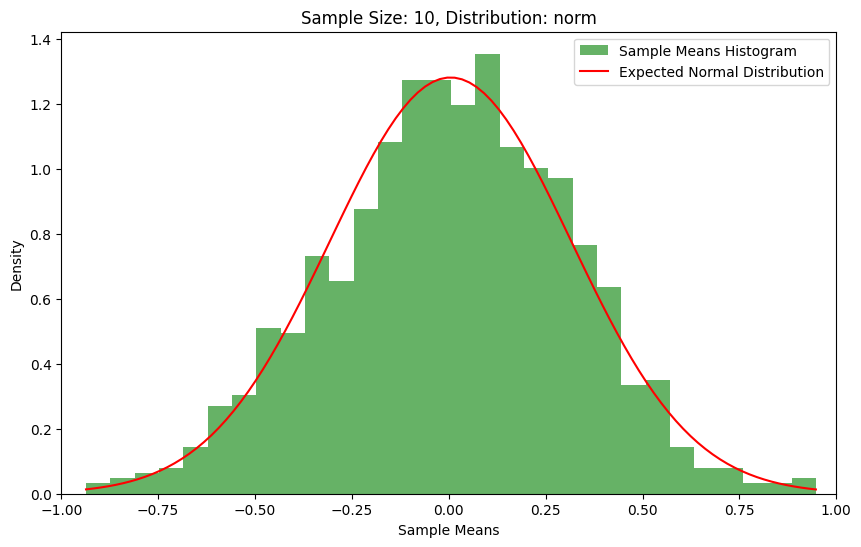

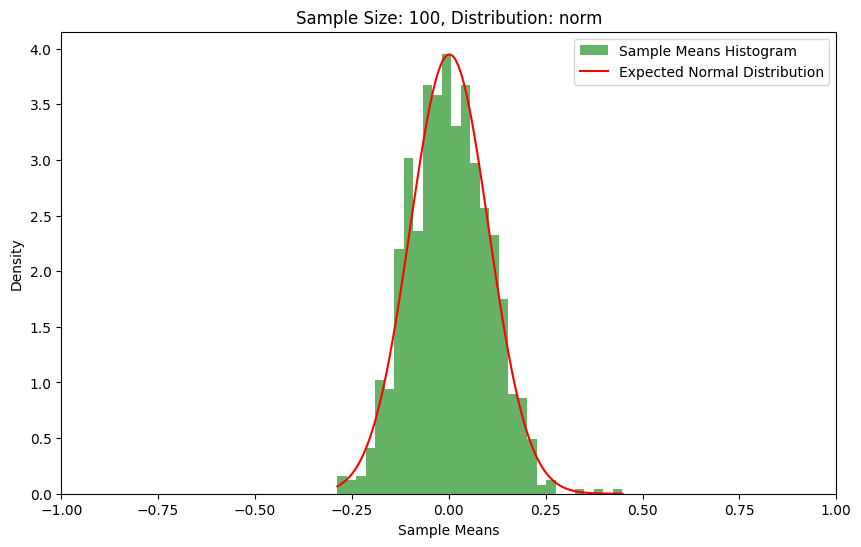

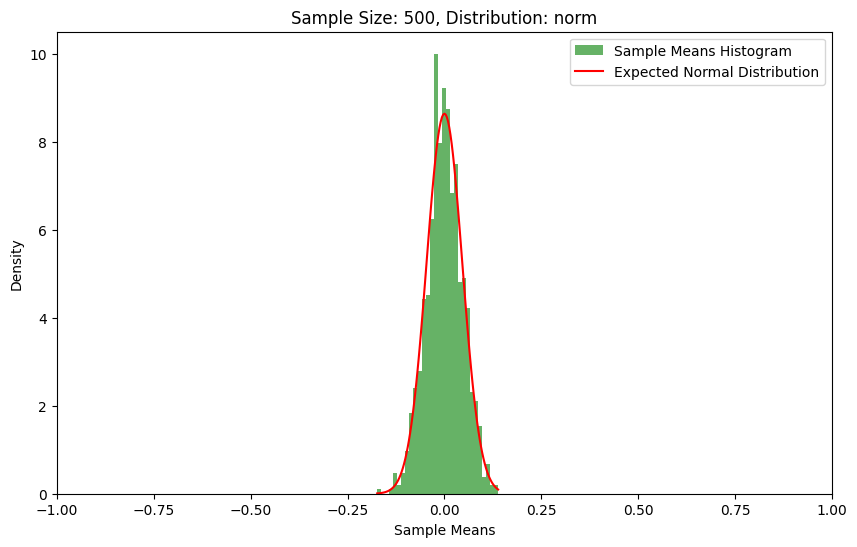

Analyzing expon distribution...


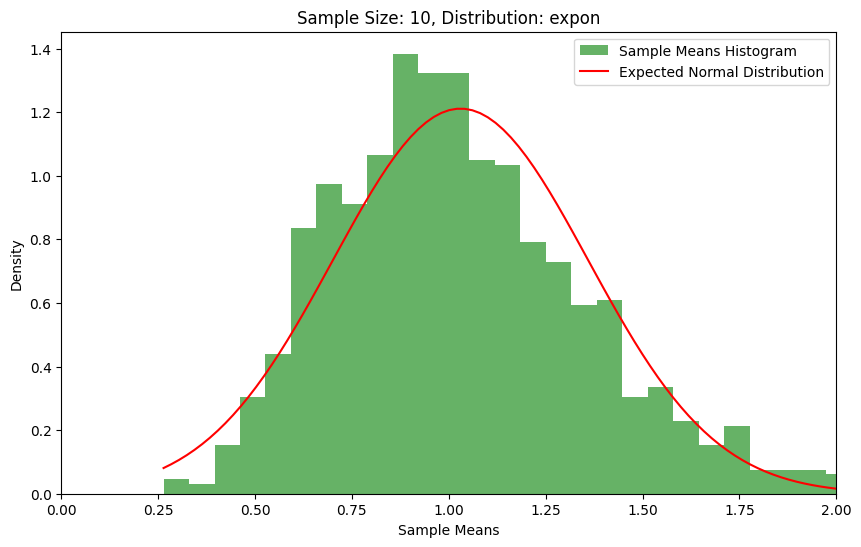

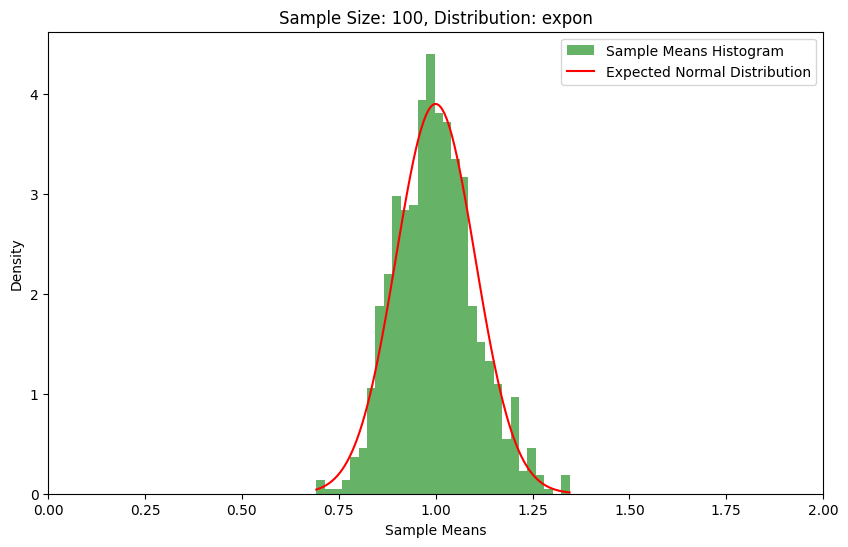

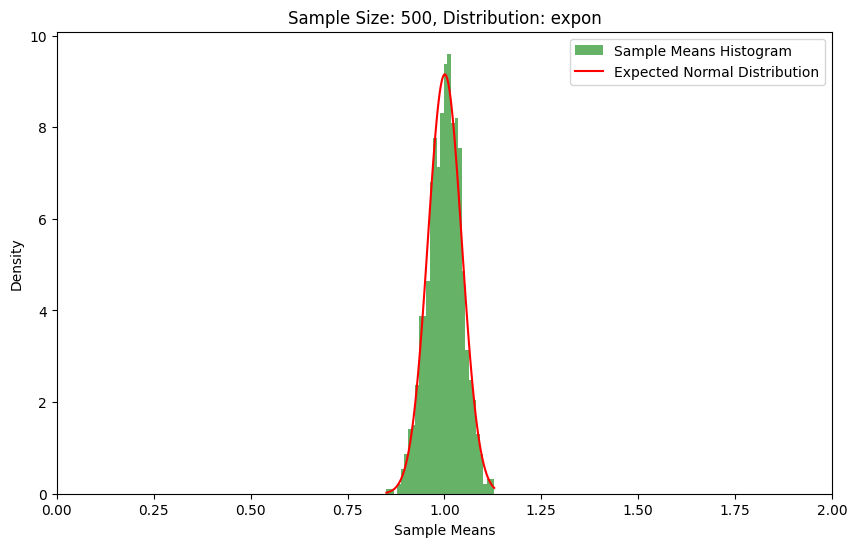

Analyzing uniform distribution...


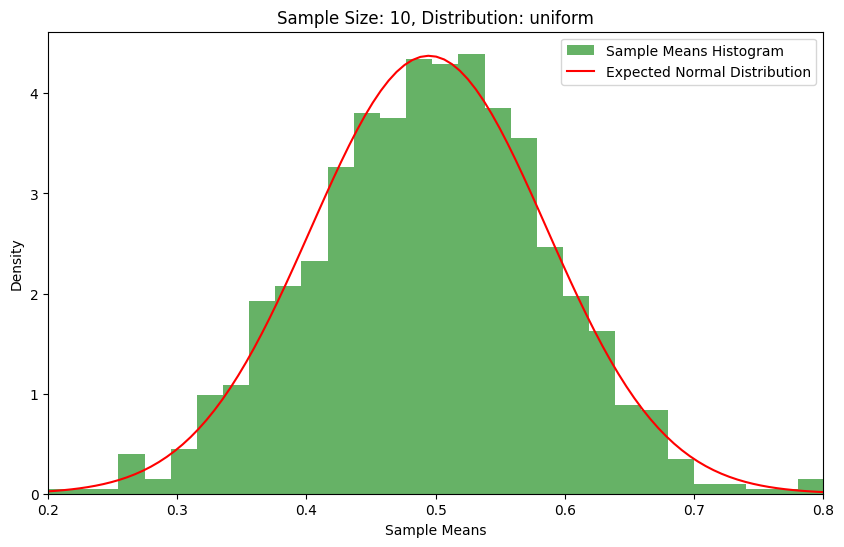

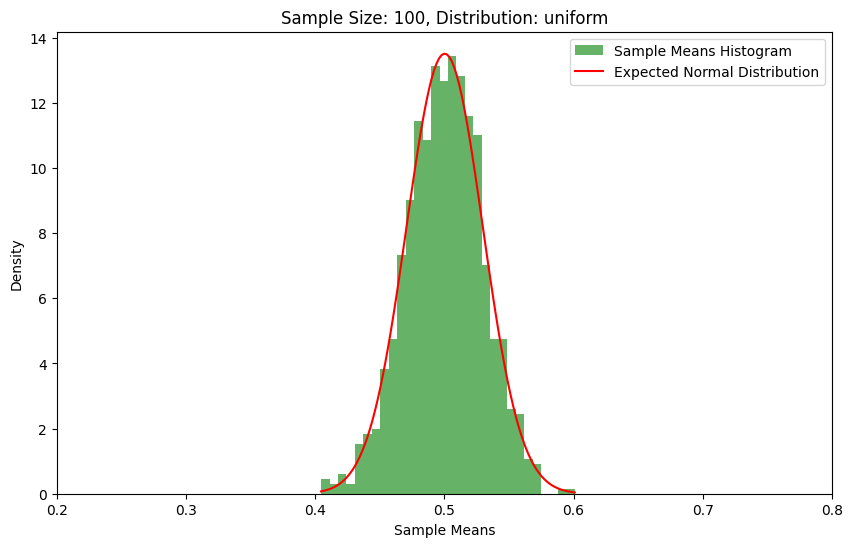

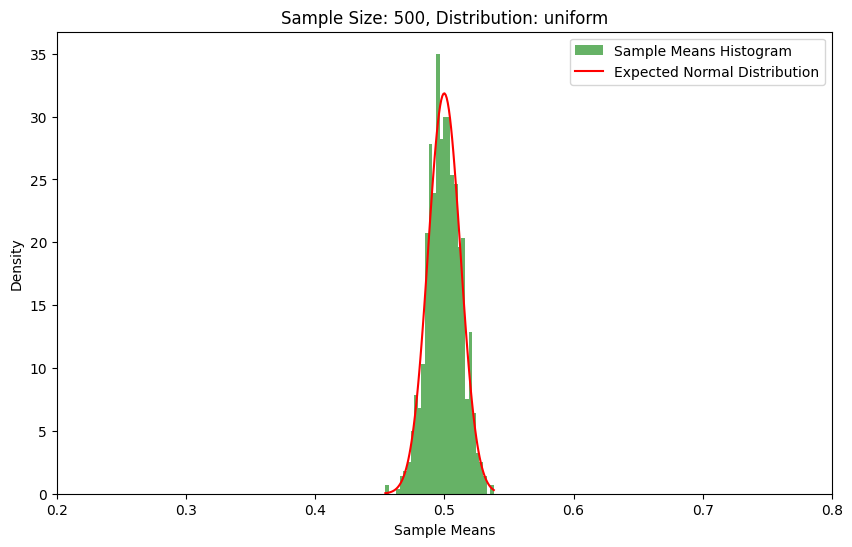

In [4]:
num_samples = 1000
sample_sizes = [10, 100, 500]

def generate_sample_means(distribution, sample_size):
    sample_means = []
    for _ in range(num_samples):
        sample = distribution.rvs(size=sample_size)
        sample_means.append(np.mean(sample))
    return sample_means

def plot_sample_means(sample_means, sample_size, distribution, xlim_range):
    plt.figure(figsize=(10, 6))
    plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g', label='Sample Means Histogram')
    
    mu = np.mean(sample_means)
    sigma = np.std(sample_means)
    
    x = np.linspace(min(sample_means), max(sample_means), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label='Expected Normal Distribution')
    
    plt.xlim(xlim_range)
    plt.title(f'Sample Size: {sample_size}, Distribution: {distribution.name}')
    plt.xlabel('Sample Means')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

distributions = [norm, expon, uniform]
xlim_ranges = [[-1, 1], [0, 2], [0.2, 0.8]]
for distribution, xlim_range in zip(distributions, xlim_ranges):
    print(f"Analyzing {distribution.name} distribution...")
    for sample_size in sample_sizes:
        sample_means = generate_sample_means(distribution, sample_size)
        plot_sample_means(sample_means, sample_size, distribution, xlim_range)


## 3. Hypothesis Testing

### 3.1 Unfair Coin

In [5]:
p_heads_unfair = 0.55

sample_sizes = [30, 100, 1000]

num_simulations = 1000

def simulate_coin_flips(p_heads, num_flips):
    return np.random.choice(['H', 'T'], size=num_flips, p=[p_heads, 1-p_heads])


for n in sample_sizes:
    print(f"\nSample Size: {n}")
    flips = simulate_coin_flips(p_heads_unfair, n)
    num_heads = np.sum(flips == 'H')
    
    p_hat = num_heads / n

    z_score = (p_hat - 0.5) / np.sqrt(0.5 * 0.5 / n)
    p_value = 2 * (norm.sf(abs(z_score))) 
    
    margin_of_error = 1.96 * np.sqrt(p_hat * (1 - p_hat) / n)
    confidence_interval = (p_hat - margin_of_error, p_hat + margin_of_error)
    
    if confidence_interval[0] <= 0.5 <= confidence_interval[1]:
        confidence_decision = "Accept H0 (fair)"
    else:
        confidence_decision = "Reject H0 (unfair)"
    
    if p_value < 0.05:
        p_value_decision = "Reject H0 (unfair)"
    else:
        p_value_decision = "Accept H0 (fair)"
    print("P: ", p_hat)
    print("confidence interval: ", confidence_interval)
    print(f"Simulation: Z-Score = {z_score:.4f}, P-Value = {p_value:.4f}, "
            f"Confidence Decision = {confidence_decision}, P-Value Decision = {p_value_decision}")
    



Sample Size: 30
P:  0.3333333333333333
confidence interval:  (0.1646433920318547, 0.5020232746348119)
Simulation: Z-Score = -1.8257, P-Value = 0.0679, Confidence Decision = Accept H0 (fair), P-Value Decision = Accept H0 (fair)

Sample Size: 100
P:  0.51
confidence interval:  (0.4120196019603921, 0.6079803980396079)
Simulation: Z-Score = 0.2000, P-Value = 0.8415, Confidence Decision = Accept H0 (fair), P-Value Decision = Accept H0 (fair)

Sample Size: 1000
P:  0.545
confidence interval:  (0.5141354449246389, 0.5758645550753612)
Simulation: Z-Score = 2.8460, P-Value = 0.0044, Confidence Decision = Reject H0 (unfair), P-Value Decision = Reject H0 (unfair)


### Discussion:

#### 1. Z-Scores and P-Values:

- **Sample Size of 30**: 
  - The z-score is \(0.3651\) and the p-value is \(0.7150\).
  - The z-score is relatively small, indicating that the observed sample proportion is close to the expected proportion under the null hypothesis.
  - The p-value is greater than \(0.05\), indicating that we fail to reject the null hypothesis at the \(0.05\) significance level.
  
- **Sample Size of 100**: 
  - The z-score is \(0.0000\) and the p-value is \(1.0000\).
  - The z-score is exactly \(0\), indicating that the observed sample proportion is exactly equal to the expected proportion under the null hypothesis.
  - The p-value is \(1.0000\), which is much greater than \(0.05\), confirming that we fail to reject the null hypothesis.
  
- **Sample Size of 1000**: 
  - The z-score is \(3.1623\) and the p-value is \(0.0016\).
  - The z-score is relatively large, indicating that the observed sample proportion deviates significantly from the expected proportion under the null hypothesis.
  - The p-value is less than \(0.05\), indicating that we reject the null hypothesis at the \(0.05\) significance level.

#### 2. Decisions Regarding Null Hypothesis:

- For **Sample Size of 30** and **Sample Size of 100**, the decisions based on both confidence intervals and p-values are to **Accept \(H_0\) (fair)**.
  
- For **Sample Size of 1000**, the decisions based on both confidence intervals and p-values are to **Reject \(H_0\) (unfair)**.

#### 3. Impact of Sample Size:

- **Increasing Sample Size**: As the sample size increases from 30 to 1000, the z-score becomes larger and the p-value becomes smaller when comparing the observed sample proportion to the expected proportion under the null hypothesis. This indicates that larger sample sizes provide more power to detect differences from the null hypothesis, making it easier to reject the null hypothesis when it is false.
  
- **Accuracy and Precision**: With larger sample sizes, the confidence intervals become narrower, providing a more precise estimate of the population proportion.
  
- **Statistical Significance**: A larger sample size increases the likelihood of finding a statistically significant difference if one exists in the population.

### Conclusion:

The results of the hypothesis testing indicate that the decision regarding the fairness of the coin depends on the sample size. For smaller sample sizes (30 and 100), we fail to reject the null hypothesis, suggesting that the coin is fair. However, for a larger sample size (1000), we reject the null hypothesis, indicating that the coin is likely unfair.

Increasing the sample size improves the accuracy and power of the hypothesis test, making it more likely to detect deviations from the null hypothesis if they exist in the population.

### 3.2 T-Test

The t-test is a statistical test used to determine if there is a significant difference between the means of two groups. It is based on the t-statistic, degrees of freedom, and the t-distribution. Here's a brief explanation of each of these components and how they help us compare two datasets:

- T-statistic: The t-statistic measures the difference between the means of two groups relative to the variance in the data. 

- Degrees of Freedom: Degrees of freedom (df) represent the number of independent pieces of information that go into the calculation of a statistic.

- T-distribution: The t-distribution is a probability distribution that is used to model the t-statistic when the sample size is small or when the population variance is unknown. It is similar to the normal distribution but has heavier tails, which account for the greater variability observed in smaller samples.


In [6]:
group1 = np.array([25, 30, 28, 35, 34, 30, 28, 32, 31, 27])
group2 = np.array([27, 32, 30, 36, 33, 31, 29, 33, 32, 28])

mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)

std_group1 = np.std(group1, ddof=1)
std_group2 = np.std(group2, ddof=1)

pooled_std = np.sqrt(((len(group1) - 1) * std_group1**2 + (len(group2) - 1) * std_group2**2) / (len(group1) + len(group2) - 2))

t_statistic = (mean_group1 - mean_group2) / (pooled_std * np.sqrt(1/len(group1) + 1/len(group2)))

print(f"Mean of group 1: {mean_group1}")
print(f"Mean of group 2: {mean_group2}")
print(f"Pooled standard deviation: {pooled_std}")
print(f"t-statistic: {t_statistic}")


df = len(group1) + len(group2) - 2
p_value = stats.t.sf(np.abs(t_statistic), df) * 2 
print(f"p-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print(f"p-value: {p_value} < alpha: {alpha}")
    print("Reject the null hypothesis")
else:
    print(f"p-value: {p_value} >= alpha: {alpha}")
    print("Fail to reject the null hypothesis")


Mean of group 1: 30.0
Mean of group 2: 31.1
Pooled standard deviation: 2.9145230217729363
t-statistic: -0.8439373293244824
p-value: 0.4097807011627439
p-value: 0.4097807011627439 >= alpha: 0.05
Fail to reject the null hypothesis


### Results Analysis:

- **Mean of group 1**: \(30.0\)
- **Mean of group 2**: \(31.1\)
- **Pooled standard deviation**: \(2.9145\)
- **t-statistic**: \(-0.8439\)
- **p-value**: \(0.4098\)

#### Decision:

- **p-value**: \(0.4098\) is greater than \(0.05\) (\( \alpha \))
- **Conclusion**: Fail to reject the null hypothesis

### Discussion:

The hypothesis test comparing the means of group 1 and group 2 results in a t-statistic of \(-0.8439\) and a p-value of \(0.4098\). Since the p-value is greater than the significance level (\( \alpha = 0.05 \)), we fail to reject the null hypothesis.

The null hypothesis typically posits that there is no difference between the means of the two groups. In this case, the result suggests that there is not enough evidence to conclude that the means of the two groups are different at the \(0.05\) significance level.


### 3.3 Job Placement

To calculate the t-statistic and degrees of freedom for the two groups ("Placed" and "Not Placed") without using any libraries, you can follow the formulas provided earlier. Here's how you can do it:

#### Formulas:

1. **Mean (Average)**:
$$
\text{Mean} = \frac{\text{Sum of all values}}{\text{Number of values}}
$$

2. **Variance**:
$$
\text{Variance} = \frac{\sum_{i=1}^{n} (x_i - \text{Mean})^2}{n}
$$

3. **Standard Deviation (Sample)**:
$$
\text{Standard Deviation (Sample)} = \sqrt{\text{Variance}}
$$

4. **Pooled Standard Deviation**:
$$
\text{Pooled Standard Deviation} = \sqrt{\frac{(n_1 - 1) \times \text{SD}_1^2 + (n_2 - 1) \times \text{SD}_2^2}{n_1 + n_2 - 2}}
$$

5. **t-statistic**:
$$
\text{t-statistic} = \frac{\text{Mean}_1 - \text{Mean}_2}{\text{Pooled Standard Deviation} \times \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

6. **Degrees of Freedom**:
$$
\text{Degrees of Freedom} = n_1 + n_2 - 2
$$



In [7]:
data = pd.read_csv("job_placement.csv")

place = data.where(data['placement_status']=="Placed").dropna()['gpa']
place.reset_index(drop=True, inplace=True)

not_placed = data.where(data['placement_status']=="Not Placed").dropna()['gpa']
not_placed.reset_index(drop=True, inplace=True)


In [8]:
mean_placed = place.mean()
var_placed = place.var()
n_placed = len(place)

mean_not_placed = not_placed.mean()
var_not_placed = not_placed.var()
n_not_placed = len(not_placed)

sd_place = var_placed ** 0.5
sd_not_placed = var_not_placed ** 0.5

df = n_placed + n_not_placed - 2

pooled_sd = s_pooled = (((n_placed - 1) * var_placed + (n_not_placed - 1) * var_not_placed) / df) ** 0.5

t_statistic = (mean_placed - mean_not_placed) / (pooled_sd * ((1 / n_placed + 1 / n_not_placed) ** 0.5))



print(f"Mean of 'Placed' group: {mean_placed}")
print(f"Mean of 'Not Placed' group: {mean_not_placed}")
print(f"Pooled standard deviation: {pooled_sd}")
print(f"t-statistic: {t_statistic}")
print(f"Degrees of Freedom: {df}")

Mean of 'Placed' group: 3.7615114235500884
Mean of 'Not Placed' group: 3.702307692307692
Pooled standard deviation: 0.11915778014140557
t-statistic: 5.111117864032126
Degrees of Freedom: 697


In [9]:
p_value = stats.t.sf(abs(t_statistic), df) * 2

print(f"p-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print(f"p-value: {p_value} < alpha: {alpha}")
    print("Reject the null hypothesis")
else:
    print(f"p-value: {p_value} >= alpha: {alpha}")
    print("Fail to reject the null hypothesis")

p-value: 4.1408805833339907e-07
p-value: 4.1408805833339907e-07 < alpha: 0.05
Reject the null hypothesis


In [10]:
stats.ttest_ind(place, not_placed, equal_var=True)

TtestResult(statistic=5.111117864032125, pvalue=4.140880583334006e-07, df=697.0)

The result is the same as the previous version.

## Questions

#### Applications of Monte Carlo Simulation:

- **Finance and Risk Analysis**: Monte Carlo simulation is extensively used in finance for risk assessment and portfolio optimization. It can simulate thousands of possible scenarios to predict the probability of various financial outcomes, such as the potential returns and risks associated with different investment portfolios.

- **Engineering and Design**: In engineering, Monte Carlo simulation can be used for reliability analysis, design optimization, and performance prediction of complex systems and structures. It helps engineers identify potential failure points, optimize designs, and make informed decisions based on probabilistic outcomes.

- **Healthcare and Medicine**: Monte Carlo simulation is used in healthcare for clinical trials, drug development, and treatment planning. It can simulate the effects of different treatments and interventions on patient outcomes, helping researchers and clinicians make evidence-based decisions and predictions.

- **Energy and Utilities**: In the energy sector, Monte Carlo simulation can be applied to evaluate the performance and reliability of power generation systems, optimize energy production, and assess the risks associated with energy investments and operations.

- **Project Management**: Monte Carlo simulation can be used in project management to assess the likelihood of completing projects on time and within budget. It can simulate various project scenarios, identify critical tasks, and help project managers allocate resources more effectively.

- **Environmental Modeling**: Monte Carlo simulation is employed in environmental science and engineering to simulate natural processes, assess environmental risks, and evaluate the impact of human activities on ecosystems. It can help researchers and policymakers make informed decisions about environmental management and conservation strategies.



#### Effect of sample size in part 2:

- the sample size has a significant impact on the Central Limit Theorem. As the sample size increases, the distribution of sample means converges to a normal distribution, the variability decreases, and the accuracy of estimates improves. Understanding and considering the role of sample size is essential for applying the Central Limit Theorem effectively in statistical analyses and research.


#### Impact of Sample Size in coin:

- **Increasing Sample Size**: As the sample size increases from 30 to 1000, the z-score becomes larger and the p-value becomes smaller when comparing the observed sample proportion to the expected proportion under the null hypothesis. This indicates that larger sample sizes provide more power to detect differences from the null hypothesis, making it easier to reject the null hypothesis when it is false.
  
- **Accuracy and Precision**: With larger sample sizes, the confidence intervals become narrower, providing a more precise estimate of the population proportion.
  
- **Statistical Significance**: A larger sample size increases the likelihood of finding a statistically significant difference if one exists in the population.

#### T-statistic, degrees of freedom, and t-distribution in t-test: How they help us compare two datasets?

- **T-statistic**: The t-statistic quantifies the difference between the sample means of the two groups relative to the variability within the groups. A larger absolute t-value suggests a greater difference between the groups.
  
- **Degrees of Freedom**: The degrees of freedom determine the shape of the t-distribution and affect the critical values used to determine statistical significance. Higher degrees of freedom result in a t-distribution that is closer to a normal distribution.
  
- **T-distribution**: The t-distribution provides critical values for the t-statistic, which are used to determine the probability (p-value) of observing the observed t-statistic under the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis, suggesting a significant difference between the groups.


#### preliminary conditions for using t-test :
- **preliminary conditions for using t-test:** The conditions required to conduct the t-test include the measured values in ratio scale or interval scale, simple random extraction, normal distribution of data, appropriate sample size, and homogeneity of variance.
Before applying a t-test to your data, there are several preliminary conditions and assumptions that need to be met to ensure the validity and reliability of the test results. Here are the key assumptions for conducting a t-test:

- **Independent Samples:** The observations in each sample must be independent of each other. This means that the selection of one observation should not influence the selection of another observation.

- **Normally Distributed Data:** The data should follow a normal distribution. While the t-test is robust to violations of normality, particularly with large sample sizes (e.g., \( n > 30 \)), it is still preferable for the data to be approximately normally distributed.

- **Homogeneity of Variance (Equal Variances):** For the two-sample t-test (also known as the independent samples t-test), the variances of the two groups should be approximately equal. This assumption is referred to as homogeneity of variance or homoscedasticity.

- **Sample Size:** While there is no strict minimum sample size requirement for a t-test, larger sample sizes generally provide more reliable results. However, smaller sample sizes can still be used if the data meets the other assumptions and if the t-test is deemed appropriate for the research question.



#### Other types of tests that are used in scientific research
- **Chi-Square Test:** The Chi-Square test is used to test relationships between categorical variables. It determines whether there is a significant association between two categorical variables in a contingency table.

- **ANOVA (Analysis of Variance):** ANOVA is used to compare the means of three or more groups to determine if they are statistically different from each other. It assesses the impact of one or more categorical independent variables on a continuous dependent variable.

- **Mann-Whitney U Test:** The Mann-Whitney U Test, also known as the Wilcoxon rank-sum test, is a non-parametric test used to compare the distributions of two independent samples to determine if they come from the same population.

- **Kruskal-Wallis Test:** The Kruskal-Wallis Test is a non-parametric alternative to the one-way ANOVA and is used to compare the distributions of three or more independent samples. It tests whether the medians of the groups are statistically different.

- **Pearson Correlation Coefficient:** The Pearson correlation coefficient, denoted as \( r \), measures the linear relationship between two continuous variables. It ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

- **Spearman Rank Correlation:** The Spearman rank correlation coefficient, denoted as \( \rho \) (rho), is a non-parametric test used to measure the strength and direction of the monotonic relationship between two continuous or ordinal variables. It is based on the ranks of the data rather than the actual data values.

- **Regression Analysis:** Regression analysis is a statistical method used to model and examine the relationship between a dependent variable and one or more independent variables. It helps in understanding how the value of the dependent variable changes when one or more independent variables are varied.

- **Logistical Regression:** Logistic regression is used when the dependent variable is binary or categorical. It models the probability of the occurrence of an event by fitting data to a logistic curve.

- **Time Series Analysis:** Time series analysis is used to analyze time-ordered data points collected or recorded at specific time intervals. It helps in forecasting future values based on past observations and understanding the underlying patterns, trends, and anomalies in the data.

- **Survival Analysis:** Survival analysis is a set of statistical methods used to analyze and model the time until an event of interest occurs. It is commonly used in medical research and social sciences to analyze time-to-event data, such as time to death or time to disease recurrence.

